# Yelp_Data_Challenge - Data Preprocessing

## Main tasks
1. Extract target data
    - 1.1 Read business data
    - 1.2 Filter data by city and category
    - 1.3 Keep relevant columns
    - 1.4 Save results to csv files
    - 1.5 Use the "business_id" column to filter review data
    - 1.6 Further filter data by date
2. Exploratory data analysis (EDA)
    - 2.1 Bar plots
    - 2.2 Line plots
3. Save preprocessed dataset to csv file

In [1]:
import json
import pandas as pd
import numpy as np

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [2]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

## 1.Extract target data

### 1.1 Read business data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
copy = df_business
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


### 1.2 Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category

In [6]:
# show maximum ten lines
pd.options.display.max_rows = 10

In [7]:
# Define a filter function 
def filter_on_df(df, city_name, category):
    # filter city "Las Vegas"
    city = df['city'] == city_name
    
    # filter 'categories' which are not null
    is_not_null = - df['categories'].isnull()
    
    # filter 'categories' contain specific 'category'
    category = df['categories'].apply(str).str.contains(category)
    
    df_selected = df[city & is_not_null & category]
    
    return df_selected

In [8]:
# filter city "Las Vegas", filter 'categories' contain 'Restaurants'
Las_Vegas_restaurants = filter_on_df(df_business, 'Las Vegas', 'Restaurants')
Las_Vegas_restaurants.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
52,6730 S Las Vegas Blvd,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",Pd52CjgyEU3Rb8co6QfTPw,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",Las Vegas,"{'Monday': '8:30-22:30', 'Tuesday': '8:30-22:3...",1,36.066914,-115.170848,Flight Deck Bar & Grill,Southeast,89119,13,4.0,NV
53,"6889 S Eastern Ave, Ste 101","{'GoodForMeal': {'dessert': False, 'latenight'...",4srfPk1s8nlm1YusyDUbjg,"[Fast Food, Restaurants, Sandwiches]",Las Vegas,{},1,36.064652,-115.118954,Subway,Southeast,89119,6,2.5,NV


### 1.3 Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [9]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [10]:
## Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = Las_Vegas_restaurants[selected_features]

In [11]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business.rename(columns = {"stars": "avg_stars"}, inplace = True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
# Inspect your DataFrame
df_selected_business.head(2)

,business_id,name,categories,avg_stars
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
53,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5


In [13]:
df_selected_business.shape

(5899, 4)

### 1.4 Save results to csv files

In [14]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('dataset/selected_business.csv', index = False, encoding = 'utf-8')

In [15]:
# Try reload the csv file to check if everything works fine
pd.read_csv('dataset/selected_business.csv', encoding = 'utf-8').head(2)

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
1,4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5


### 1.5 Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [16]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### Prepare dataframes to be joined, - on business_id

In [17]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index("business_id")

In [18]:
df_left.head(2)

,name,categories,avg_stars
business_id,,,
Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5


In [19]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index("business_id")

In [20]:
df_right.head(2)

,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,
0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


#### Join! and reset index

In [21]:
df_left.index = df_left.index.astype('str')
df_right.index = df_right.index.astype('str')

In [22]:
# Join df_left and df_right. 
df_merge = df_left.join(df_right)
df_merge.shape

(929606, 11)

In [23]:
# Verify the join is correct
print(len(df_merge.index.unique()))
print(df_left.shape)

5899
(5899, 3)


In [24]:
# Reset the index 
df_merge.reset_index()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2011-08-24,0,KEAHrqN-1DV0gmuNHM6Eww,5,As part of a birthday celebration weekend for ...,1,xP1IYu2eGfxMWV9tjrurIw
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,8,2011-12-20,7,Jjz9W-wBkoBoMcB8ZQs5zQ,5,We had early reservations for a party of 9 for...,9,9bxdPvAhP6cuipD5s2UnCg
...,...,...,...,...,...,...,...,...,...,...,...,...
929601,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"[Southern, Restaurants]",3.5,0,2012-10-11,6,ThiCaZ61J5KgKEV8LF1XNg,3,Guthrie's recently replaced the KFC near where...,5,eOIMO2wT_WbNqmavhnCRxw
929602,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"[Southern, Restaurants]",3.5,0,2014-02-13,0,vyUpm-a_SIOnrKbD4RhP8Q,4,As I was driving back to my hote land I notice...,0,9u8D55VqYWZWdgTO0FxuYA
929603,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"[Southern, Restaurants]",3.5,1,2014-03-02,1,sr1hjje1K7-tIWaGGLLoQw,4,My boyfriend loves the sweet tea! Just as good...,1,9stdfPJbEMcl-FBnqTHTkQ
929604,zzzaIBwimxVej4tY6qFOUQ,Guthrie's,"[Southern, Restaurants]",3.5,0,2014-03-22,0,g2MEEq_cPUSwXtBMBAhaFA,3,I really was hoping to be able to leave here g...,0,vwLV4TkRMoghs86tB1Ke8Q


### 1.6 Further filter data by date

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [25]:
# Make a filter that selects date in second half of 2017
after_2015_half = df_merge['date'] >= '2015-07-01'
before_2018 = df_merge['date'] < '2018-01-01'

In [26]:
# Filter the joined DataFrame and name it as df_final
df_final = df_merge[after_2015_half & before_2018]

In [27]:
df_final.shape

(447033, 11)

In [28]:
# Make sure the filter result is correct
print(df_final.date.min())
print(df_final.date.max())

2015-07-01
2017-12-11


In [29]:
df_final.head(2)

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
business_id,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g


## 2. Exploratory data analysis (EDA)

#### Take a glance at the final dataset

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [31]:
# Count number of reviews by each business entity, and plot the result
count_per_business = df_final.groupby('business_id')['text'].count().values

# Compute an average of stars by each business entity, and plot the result
mean_star_per_business = df_final.groupby('business_id')['stars'].mean().values

# Count how many (how long) texts by each review. Does longer texts signify higher stars?
text_len_per_row = df_final.text.apply(lambda x: len(x))
df_final['text_length'] = text_len_per_row.values

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [32]:
unique_category = []
for categories in df_final.categories:
    for cate in categories:
        if cate not in unique_category:
            unique_category.append(cate)
            
print('In total,',len(unique_category),'categories')

In total, 382 categories


In [33]:
# Convert time-series information to datetime data type
# Append an additional column 'count' for the later visualization 
df_final.date = pd.to_datetime(df_final.date)
df_final['count'] = 1
df_final = df_final.set_index('date')

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [34]:
df_final.head(2)

,name,categories,avg_stars,cool,funny,review_id,stars,text,useful,user_id,text_length,count
date,,,,,,,,,,,,
2016-03-31,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,341,1
2016-02-10,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,152,1


### 2.1 Bar plots

Text(0.5,1,'Count of review per business entity')

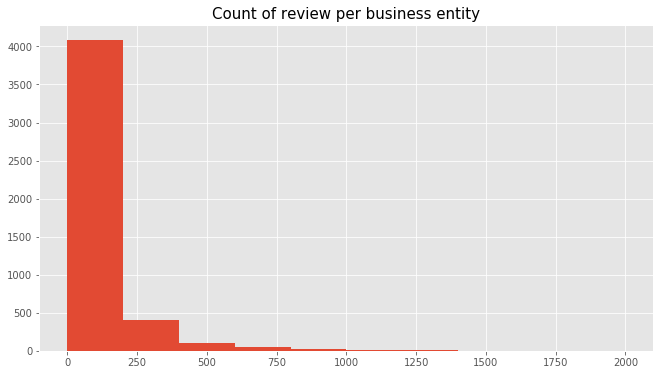

In [114]:
# plot count of review per business entity
fig = plt.figure(figsize=(11, 6))
plt.hist(count_per_business, range = (0,2000))
plt.title('Count of review per business entity',fontsize = 15)

#### Most of business entities have reviewed from 1 to 250 times

Text(0.5,1,'Average star per business entity')

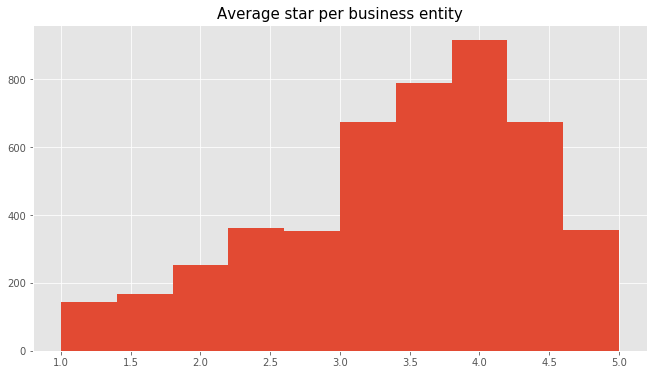

In [115]:
# plot average star per business entity
fig = plt.figure(figsize=(11, 6))
plt.hist(mean_star_per_business)
plt.title('Average star per business entity',fontsize = 15)

#### Most of business entities scored around 4.0 stars on average

4


Text(0.5,1,'Length by each review')

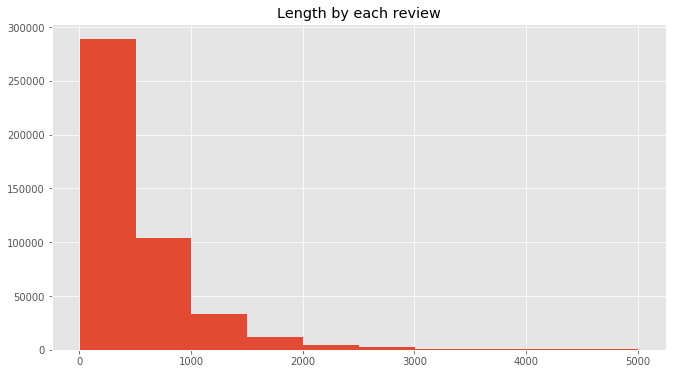

In [116]:
# plot review lengths
fig = plt.figure(figsize=(11, 6))
print(min(text_len_per_row))
plt.hist(text_len_per_row)
plt.title('Length by each review')

#### In most of time, the lengths for most reviews are within 1000

In [35]:
# group by business entity name, count and sort
review_counts_by_business_entity = df_final.groupby('name').size().sort_values()

# filter the top 10 business with the most reviews
review_counts_by_business_entity_top_10_names = review_counts_by_business_entity[-10:].index

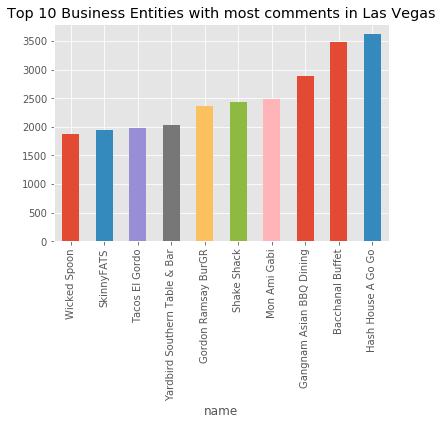

In [36]:
# we try to plot the review received by the top 10 business entities
review_counts_top_10 = df_final[df_final['name'].isin(review_counts_by_business_entity_top_10_names)]
review_counts_top_10 = review_counts_top_10.groupby('name').size().sort_values()
review_counts_top_10.plot.bar(title='Top 10 Business Entities with most comments in Las Vegas')

In [119]:
review_counts_top_10

name
Wicked Spoon                     1881
SkinnyFATS                       1949
Tacos El Gordo                   1982
Yardbird Southern Table & Bar    2024
Gordon Ramsay BurGR              2366
Shake Shack                      2438
Mon Ami Gabi                     2483
Gangnam Asian BBQ Dining         2885
Bacchanal Buffet                 3489
Hash House A Go Go               3620
dtype: int64

### 2.2 Line plots

The last record was on 2017-12-11 00:00:00


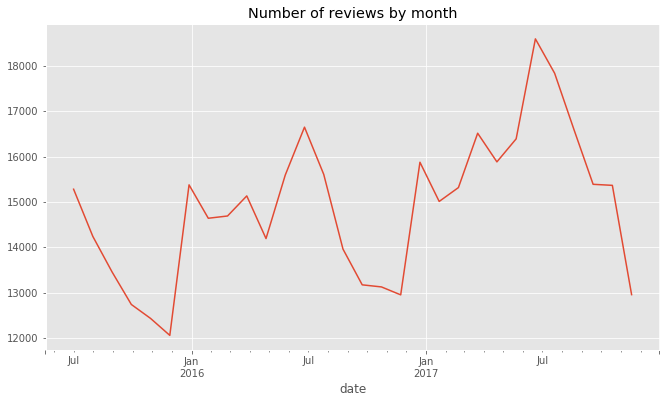

In [37]:
# plot the Number of records by month
fig = plt.figure(figsize=(11, 6))
df_final['count'].resample("30D").sum().plot()
plt.title('Number of reviews by month')
print('The last record was on', max(df_final.index))

#### Observed that a general upward trend developed from Jan, 2015 to Dec, 2017. Moreover, three peaks were appeard on the same month (July), perhaps because of the summer vacation, more poeple went to restaurants and left reviews

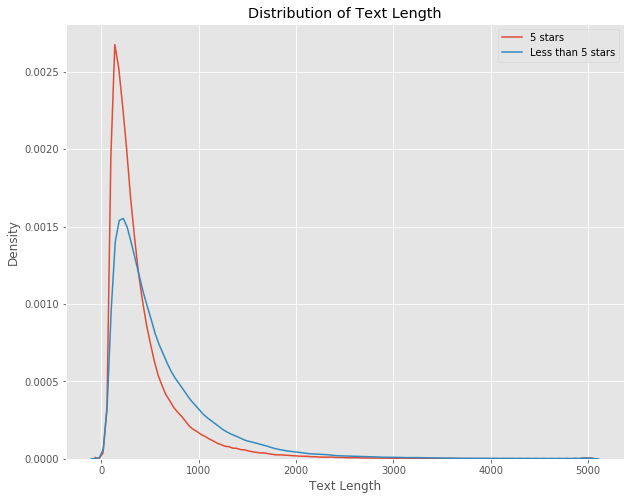

In [123]:
# plot the Distribution of Text Length of 5 stars and that of less than 5 stars
# Does longer texts usually result in a higher star score? 
# Examine the relationship between the length of text by each review and the star score

# Set the plot size
plt.figure(figsize = (10, 8))
# KDE plot of 5 stars
sns.kdeplot(df_final.loc[df_final['stars'] == 5, 'text_length'] , label = '5 stars')
# KDE plot of less than 5 stars
sns.kdeplot(df_final.loc[df_final['stars'] != 5, 'text_length'] , label = 'Less than 5 stars')
# Labeling of plot
plt.xlabel('Text Length'); plt.ylabel('Density'); plt.title('Distribution of Text Length');

#### Two distribution are slightly different, longer texts appeared more when stars is less than 5 compared with when stars is 5, which means longer texts do not stand for good rating. Perhaps because customers write more to complain rather than praise.

## 3. Save preprocessed dataset to csv file

In [168]:
# make sure it's the correct dataframe I want to store
df_final.reset_index().head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA


In [169]:
# Not store any index in the csv file
df_final.to_csv('dataset/last_2_years_restaurant_reviews.csv', index = False, encoding = 'utf-8')

In [170]:
# Read it back to make sure it's stored in a right way
pd.read_csv('dataset/last_2_years_restaurant_reviews.csv').head()

,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ
1,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g
2,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
3,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
4,Delmonico Steakhouse,"['Cajun/Creole', 'Steakhouses', 'Restaurants']",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
